<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/ml8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Comparing Single vs. Ensemble Classifiers
Task:
Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.
Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
Compare their performance using evaluation metrics such as accuracy, precision, recall,
and F1-score.
Explore the effect of changing the number of estimators (decision trees) in Random
Forest.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 50)

# 1. Decision Tree Classifier
print("Decision Tree Classifier Performance:")
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# 2. Random Forest Classifier (default, 100 estimators)
print("Random Forest Classifier (100 estimators) Performance:")
rf_model_default = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model_default, X_train, y_train, X_test, y_test)

# 3. Random Forest Classifier (varying number of estimators)
estimators_range = [10, 50, 100, 200, 500]
for n_estimators in estimators_range:
    print(f"Random Forest Classifier ({n_estimators} estimators) Performance:")
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Decision Tree Classifier Performance:
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577
--------------------------------------------------
Random Forest Classifier (100 estimators) Performance:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
--------------------------------------------------
Random Forest Classifier (10 estimators) Performance:
Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1-score: 0.9650
--------------------------------------------------
Random Forest Classifier (50 estimators) Performance:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
--------------------------------------------------
Random Forest Classifier (100 estimators) Performance:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
--------------------------------------------------
Random Forest Classifier (200 estimators) Performance:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
--------------------------------

**2. Implementing Simple Ensemble Techniques
Task:
Write a program that demonstrates the use of simple ensemble techniques: Max Voting,
Average Voting, and Weighted Average Voting (assign weights based on each model’s
performance).
Apply these techniques on a suitable dataset and compare results.**

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=10000, random_state=42)

# Fit the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Get predictions from each model
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Function for Max Voting
def max_voting(preds):
    return np.array([np.bincount(pred).argmax() for pred in zip(*preds)])

# Function for Average Voting
def average_voting(preds):
    # Assuming probabilities are available
    dt_prob = dt_model.predict_proba(X_test)[:, 1]
    rf_prob = rf_model.predict_proba(X_test)[:, 1]
    lr_prob = lr_model.predict_proba(X_test)[:, 1]
    avg_prob = np.mean([dt_prob, rf_prob, lr_prob], axis=0)
    return (avg_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Function for Weighted Average Voting
def weighted_average_voting(preds, weights):
    # Assuming probabilities are available
    dt_prob = dt_model.predict_proba(X_test)[:, 1]
    rf_prob = rf_model.predict_proba(X_test)[:, 1]
    lr_prob = lr_model.predict_proba(X_test)[:, 1]

    # Weight the probabilities
    weighted_prob = (weights[0] * dt_prob + weights[1] * rf_prob + weights[2] * lr_prob) / sum(weights)
    return (weighted_prob >= 0.5).astype(int)

# Evaluate models with simple accuracy
def evaluate_model(preds, y_test):
    return accuracy_score(y_test, preds)

# Max Voting
max_voting_pred = max_voting([dt_pred, rf_pred, lr_pred])
max_voting_accuracy = evaluate_model(max_voting_pred, y_test)

# Average Voting
avg_voting_pred = average_voting([dt_pred, rf_pred, lr_pred])
avg_voting_accuracy = evaluate_model(avg_voting_pred, y_test)

# Weighted Average Voting
# Assume we assign weights based on model performance (this is just an example)
# Here, RandomForest might have the best accuracy, so it gets a higher weight
weights = [0.3, 0.5, 0.2]  # Weights for Decision Tree, Random Forest, Logistic Regression
weighted_avg_voting_pred = weighted_average_voting([dt_pred, rf_pred, lr_pred], weights)
weighted_avg_voting_accuracy = evaluate_model(weighted_avg_voting_pred, y_test)

# Print results
print(f"Max Voting Accuracy: {max_voting_accuracy:.4f}")
print(f"Average Voting Accuracy: {avg_voting_accuracy:.4f}")
print(f"Weighted Average Voting Accuracy: {weighted_avg_voting_accuracy:.4f}")

Max Voting Accuracy: 0.9649
Average Voting Accuracy: 0.9649
Weighted Average Voting Accuracy: 0.9561


**3. Hard Voting vs. Soft Voting Classifiers
Task:
Write a program to show the difference between Hard Voting and Soft Voting classifiers
in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic
Regression, and KNN).**

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=10000, random_state=42)
knn_model = KNeighborsClassifier()

# Initialize Hard Voting Classifier
hard_voting_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('lr', lr_model),
    ('knn', knn_model)
], voting='hard')  # Hard Voting uses majority class prediction

# Initialize Soft Voting Classifier
soft_voting_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('lr', lr_model),
    ('knn', knn_model)
], voting='soft')  # Soft Voting uses average probabilities

# Fit the models
hard_voting_model.fit(X_train, y_train)
soft_voting_model.fit(X_train, y_train)

# Predict using both Hard Voting and Soft Voting classifiers
hard_voting_pred = hard_voting_model.predict(X_test)
soft_voting_pred = soft_voting_model.predict(X_test)

# Evaluate models using accuracy
hard_voting_accuracy = accuracy_score(y_test, hard_voting_pred)
soft_voting_accuracy = accuracy_score(y_test, soft_voting_pred)

# Print the results
print(f"Hard Voting Classifier Accuracy: {hard_voting_accuracy:.4f}")
print(f"Soft Voting Classifier Accuracy: {soft_voting_accuracy:.4f}")

Hard Voting Classifier Accuracy: 0.9649
Soft Voting Classifier Accuracy: 0.9737


**4. Exploring Bagging Technique (Random Forest)
Task:
Write a program to explore the Bagging technique using the RandomForestClassifier on a
suitable dataset.
Experiment with parameters such as number of estimators, maximum depth, and random
state.
Write detailed observations and justify the changes in model performance.**

n_estimators: 10, max_depth: None, Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

--------------------------------------------------------------------------------
n_estimators: 50, max_depth: None, Accuracy: 0.9708
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

--------------------------------------------------------------------------------
n_estimators: 100, max_depth: No

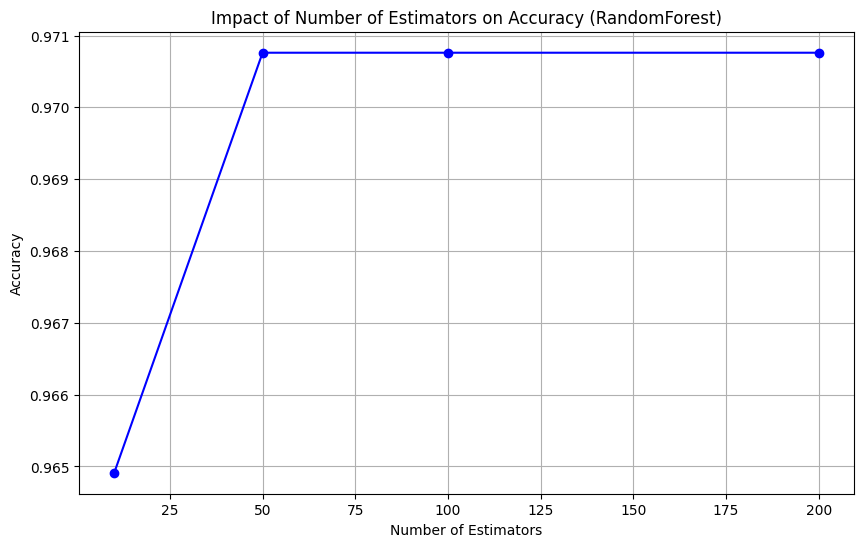

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define a function to train and evaluate the model
def evaluate_random_forest(n_estimators, max_depth, random_state=42):
    # Create the Random Forest classifier with the given parameters
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    return accuracy, report

# Step 4: Experiment with different hyperparameters

# List of different parameter settings
param_combinations = [
    (10, None),  # 10 estimators, no max depth limit
    (50, None),  # 50 estimators, no max depth limit
    (100, None),  # 100 estimators, no max depth limit
    (100, 5),    # 100 estimators, max depth = 5
    (100, 10),   # 100 estimators, max depth = 10
    (100, 20),   # 100 estimators, max depth = 20
    (200, None),  # 200 estimators, no max depth limit
]

# Evaluate each combination
results = []

for n_estimators, max_depth in param_combinations:
    accuracy, report = evaluate_random_forest(n_estimators, max_depth)
    results.append((n_estimators, max_depth, accuracy, report))

# Step 5: Display the results
for n_estimators, max_depth, accuracy, report in results:
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("-" * 80)

# Step 6: Visualizing the impact of number of estimators on accuracy
estimators_list = [10, 50, 100, 200]
accuracies = []

for n_estimators in estimators_list:
    accuracy, _ = evaluate_random_forest(n_estimators, None)  # No max depth limit
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimators_list, accuracies, marker='o', linestyle='-', color='b')
plt.title('Impact of Number of Estimators on Accuracy (RandomForest)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
